# Data Scientist Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# # load train, test, and validation datasets
# train_files, train_targets = load_dataset('../../../data/dog_images/train')
# valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
# test_files, test_targets = load_dataset('../../../data/dog_images/test')

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
# dog_names = [item[20:-1] for item in sorted(glob("../../../data/dog_images/train/*/"))]
dog_names = [item[20:-1] for item in sorted(glob('dogImages/train/*/'))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
# human_files = np.array(glob("../../../data/lfw/*/*"))
human_files = np.array(glob("data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


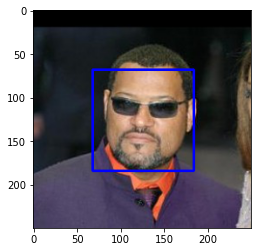

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_face_test =[]
for human_im in human_files_short:
    human_face_test.append(face_detector(human_im))

dog_face_test=[]
for dog_im in dog_files_short:
    dog_face_test.append(face_detector(dog_im))

print('Correctly detected human faces:',np.sum(human_face_test))
print('Incorrectly detected dogs as human face are:',np.sum(dog_face_test))

Correctly detected human faces: 99
Incorrectly detected dogs as human face are: 12


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [7]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

# Installing MTCNN face detection model
!pip install mtcnn

# Using MTCNN  and compare it with opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot

def MTCNN_face_detector(img_path):
    pixels = pyplot.imread(img_path)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    return len(faces) > 0

human_face_test =[]
for human_im in human_files_short:
    human_face_test.append(MTCNN_face_detector(human_im))

dog_face_test=[]
for dog_im in dog_files_short:
    dog_face_test.append(MTCNN_face_detector(dog_im))

print('Correctly detected human faces:',np.sum(human_face_test))
print('Incorrectly detected dogs as human face are:',np.sum(dog_face_test))

    100% |████████████████████████████████| 2.3MB 9.3MB/s eta 0:00:01    77% |█████████████████████████       | 1.8MB 14.5MB/s eta 0:00:01
    100% |████████████████████████████████| 88.3MB 368kB/s eta 0:00:01  0% |                                | 204kB 14.0MB/s eta 0:00:07    1% |▍                               | 1.2MB 16.1MB/s eta 0:00:06    7% |██▎                             | 6.4MB 22.8MB/s eta 0:00:04    9% |███                             | 8.4MB 20.0MB/s eta 0:00:04    10% |███▍                            | 9.5MB 20.8MB/s eta 0:00:04    13% |████▍                           | 12.2MB 22.4MB/s eta 0:00:04    16% |█████▏                          | 14.2MB 18.7MB/s eta 0:00:04    20% |██████▋                         | 18.2MB 21.3MB/s eta 0:00:04    23% |███████▍                        | 20.4MB 22.5MB/s eta 0:00:04    29% |█████████▌                      | 26.1MB 22.2MB/s eta 0:00:03    30% |█████████▉                      | 27.1MB 22.7MB/s eta 0:00:03    33% |██████████▋            

ImportError: cannot import name 'Softmax'

As we can see it has better recognition for human faces. 

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [7]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [8]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_face_test =[]
for human_im in human_files_short:
    human_face_test.append(dog_detector(human_im))

dog_face_test=[]
for dog_im in dog_files_short:
    dog_face_test.append(dog_detector(dog_im))

print('Number of incorrectly classified humans as dogs:',np.sum(human_face_test))
print('Number of correctly classified dogs:',np.sum(dog_face_test))

Number of incorrectly classified humans as dogs: 0
Number of correctly classified dogs: 100


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [11]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:13<00:00, 60.84it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 

## Model I: First model to examine

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(133, activation='softmax'))


### TODO: Define your architecture.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      416       
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 32)      4128      
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 64)        8256      
__________

### Compile the Model

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [24]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_100epoch_2dense.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, train_targets, 
                  validation_data=(valid_tensors, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/100
6680/6680 [==============================] - 52s 8ms/step - loss: 4.8808 - acc: 0.0117 - val_loss: 4.8675 - val_acc: 0.0108
Epoch 2/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8712 - acc: 0.0117 - val_loss: 4.8687 - val_acc: 0.0108
Epoch 3/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8753 - acc: 0.0115 - val_loss: 4.8682 - val_acc: 0.0108
Epoch 4/100
6680/6680 [==============================] - 52s 8ms/step - loss: 4.8668 - acc: 0.0123 - val_loss: 4.8675 - val_acc: 0.0120
Epoch 5/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8663 - acc: 0.0115 - val_loss: 4.8690 - val_acc: 0.0108
Epoch 6/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8695 - acc: 0.0118 - val_loss: 4.8685 - val_acc: 0.0108
Epoch 7/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8732 - acc: 0.0117 - val_loss: 4.8694 - val_acc: 0.0108
E

6680/6680 [==============================] - 52s 8ms/step - loss: 4.8406 - acc: 0.0178 - val_loss: 4.8598 - val_acc: 0.0144
Epoch 32/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8397 - acc: 0.0189 - val_loss: 4.8684 - val_acc: 0.0144
Epoch 33/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8415 - acc: 0.0180 - val_loss: 4.8741 - val_acc: 0.0132
Epoch 34/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8347 - acc: 0.0187 - val_loss: 4.8909 - val_acc: 0.0120
Epoch 35/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8293 - acc: 0.0199 - val_loss: 4.8715 - val_acc: 0.0156
Epoch 36/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8356 - acc: 0.0196 - val_loss: 4.8692 - val_acc: 0.0132
Epoch 37/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.8377 - acc: 0.0201 - val_loss: 4.8821 - val_acc: 0.0120
Epoch 38/100
6680/6680 [==============================

Epoch 63/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.7570 - acc: 0.0331 - val_loss: 4.8749 - val_acc: 0.0132
Epoch 64/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.7500 - acc: 0.0350 - val_loss: 4.8762 - val_acc: 0.0156
Epoch 65/100
6680/6680 [==============================] - 52s 8ms/step - loss: 4.7534 - acc: 0.0328 - val_loss: 4.8504 - val_acc: 0.0168
Epoch 66/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.7385 - acc: 0.0371 - val_loss: 4.8539 - val_acc: 0.0144
Epoch 67/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.7332 - acc: 0.0373 - val_loss: 4.8970 - val_acc: 0.0156
Epoch 68/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.7201 - acc: 0.0400 - val_loss: 4.8806 - val_acc: 0.0132
Epoch 69/100
6680/6680 [==============================] - 51s 8ms/step - loss: 4.7188 - acc: 0.0410 - val_loss: 4.8741 - val_acc: 0.0144
Epoch 70/100
6680/6680 [=================

Epoch 91/100
6680/6680 [==============================] - 51s 8ms/step - loss: 3.5391 - acc: 0.2006 - val_loss: 4.5538 - val_acc: 0.0754
Epoch 92/100
6680/6680 [==============================] - 51s 8ms/step - loss: 3.4598 - acc: 0.2091 - val_loss: 4.3823 - val_acc: 0.0659
Epoch 93/100
6680/6680 [==============================] - 51s 8ms/step - loss: 3.3567 - acc: 0.2278 - val_loss: 4.4408 - val_acc: 0.0814
Epoch 94/100
6680/6680 [==============================] - 51s 8ms/step - loss: 3.2184 - acc: 0.2521 - val_loss: 4.4691 - val_acc: 0.0802
Epoch 95/100
6680/6680 [==============================] - 52s 8ms/step - loss: 3.1260 - acc: 0.2639 - val_loss: 4.3704 - val_acc: 0.0611
Epoch 96/100
6680/6680 [==============================] - 51s 8ms/step - loss: 2.9870 - acc: 0.2894 - val_loss: 4.4470 - val_acc: 0.0838
Epoch 97/100
6680/6680 [==============================] - 51s 8ms/step - loss: 2.9047 - acc: 0.3079 - val_loss: 4.4628 - val_acc: 0.0683
Epoch 98/100
6680/6680 [=================

### Load the Model with the Best Validation Loss

In [25]:
model.load_weights('saved_models/weights.best.from_scratch_100epoch_2dense.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [26]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 100 epochs: %.4f%%' % test_accuracy)

Test accuracy after 100 epochs: 7.1770%


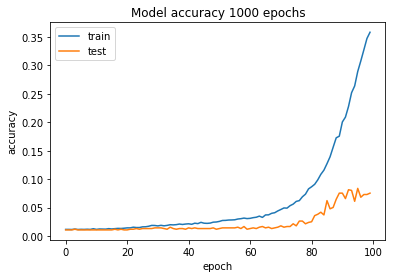

In [38]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy 100 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

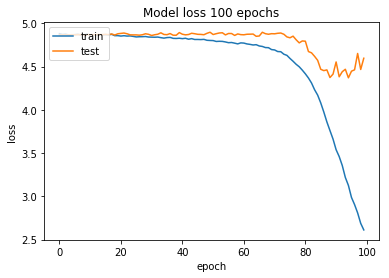

In [40]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss 100 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model II: Adding more convlutional layer with global average pooling

In [45]:
conv2_model = Sequential()
conv2_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
conv2_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(BatchNormalization())
conv2_model.add(MaxPooling2D(pool_size=2))

conv2_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(BatchNormalization())
conv2_model.add(MaxPooling2D(pool_size=2))

conv2_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(BatchNormalization())
conv2_model.add(MaxPooling2D(pool_size=2))

conv2_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
conv2_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
#conv2_model.add(BatchNormalization())
conv2_model.add(GlobalAveragePooling2D())
#model.add(MaxPooling2D(pool_size=2))

conv2_model.add(Dropout(0.3))
#conv2_model.add(Flatten())
conv2_model.add(Dense(512, activation='relu'))
conv2_model.add(Dropout(0.4))
conv2_model.add(Dense(256, activation='relu'))
conv2_model.add(Dropout(0.3))
conv2_model.add(Dense(133, activation='softmax'))

conv2_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_10epoch_multiconv.hdf5', 
                               verbose=1, save_best_only=True)

history = conv2_model.fit(train_tensors, train_targets, 
                      validation_data=(valid_tensors, valid_targets),
                      epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)


Train on 6680 samples, validate on 835 samples
Epoch 1/10
6680/6680 [==============================] - 307s 46ms/step - loss: 4.9864 - acc: 0.0075 - val_loss: 4.8791 - val_acc: 0.0096
Epoch 2/10
6680/6680 [==============================] - 303s 45ms/step - loss: 4.8750 - acc: 0.0120 - val_loss: 4.8510 - val_acc: 0.0144
Epoch 3/10
6680/6680 [==============================] - 303s 45ms/step - loss: 4.7921 - acc: 0.0130 - val_loss: 5.1122 - val_acc: 0.0108
Epoch 4/10
6680/6680 [==============================] - 303s 45ms/step - loss: 4.6951 - acc: 0.0178 - val_loss: 4.7222 - val_acc: 0.0204
Epoch 5/10
6680/6680 [==============================] - 303s 45ms/step - loss: 4.6556 - acc: 0.0204 - val_loss: 4.6766 - val_acc: 0.0216
Epoch 6/10
6680/6680 [==============================] - 303s 45ms/step - loss: 4.6161 - acc: 0.0216 - val_loss: 4.6489 - val_acc: 0.0240
Epoch 7/10
6680/6680 [==============================] - 303s 45ms/step - loss: 4.5665 - acc: 0.0247 - val_loss: 4.7009 - val_acc: 0

In [46]:
conv2_model.load_weights('saved_models/weights.best.from_scratch_10epoch_multiconv.hdf5')
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(conv2_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 10 epochs: %.4f%%' % test_accuracy)

Test accuracy after 10 epochs: 3.3493%


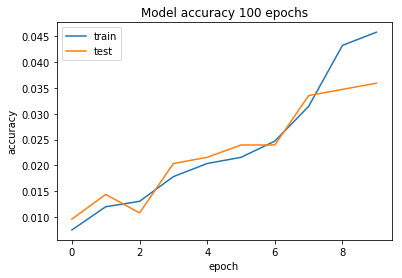

In [47]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy 100 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

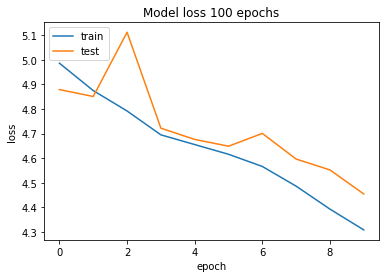

In [48]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss 100 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### With Maxpooling and removing batch normalization
Removing BatchNormalization

In [49]:
maxpool_model = Sequential()
maxpool_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
maxpool_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(MaxPooling2D(pool_size=2))

maxpool_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(MaxPooling2D(pool_size=2))

maxpool_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(MaxPooling2D(pool_size=2))

maxpool_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
maxpool_model.add(MaxPooling2D(pool_size=2))

maxpool_model.add(Dropout(0.3))
maxpool_model.add(Flatten())
maxpool_model.add(Dense(512, activation='relu'))
maxpool_model.add(Dropout(0.4))
maxpool_model.add(Dense(256, activation='relu'))
maxpool_model.add(Dropout(0.3))
maxpool_model.add(Dense(133, activation='softmax'))

maxpool_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
epochs = 30

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_30epoch_maxpool.hdf5', 
                               verbose=1, save_best_only=True)

history = maxpool_model.fit(train_tensors, train_targets, 
                  validation_data=(valid_tensors, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)


Train on 6680 samples, validate on 835 samples
Epoch 1/30
6680/6680 [==============================] - 278s 42ms/step - loss: 4.9279 - acc: 0.0111 - val_loss: 5.0459 - val_acc: 0.0108
Epoch 2/30
6680/6680 [==============================] - 275s 41ms/step - loss: 4.8749 - acc: 0.0112 - val_loss: 4.8692 - val_acc: 0.0108
Epoch 3/30
6680/6680 [==============================] - 272s 41ms/step - loss: 4.8705 - acc: 0.0100 - val_loss: 4.8690 - val_acc: 0.0108
Epoch 4/30
6680/6680 [==============================] - 272s 41ms/step - loss: 4.8678 - acc: 0.0112 - val_loss: 4.8694 - val_acc: 0.0108
Epoch 5/30
6680/6680 [==============================] - 272s 41ms/step - loss: 4.8681 - acc: 0.0111 - val_loss: 4.8690 - val_acc: 0.0108
Epoch 6/30
6680/6680 [==============================] - 272s 41ms/step - loss: 4.8665 - acc: 0.0117 - val_loss: 4.8689 - val_acc: 0.0108
Epoch 7/30
6680/6680 [==============================] - 272s 41ms/step - loss: 4.8661 - acc: 0.0115 - val_loss: 4.8687 - val_acc: 0

In [52]:
maxpool_model.load_weights('saved_models/weights.best.from_scratch_30epoch_maxpool.hdf5')
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(maxpool_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 30 epochs: %.4f%%' % test_accuracy)

Test accuracy after 30 epochs: 1.1962%


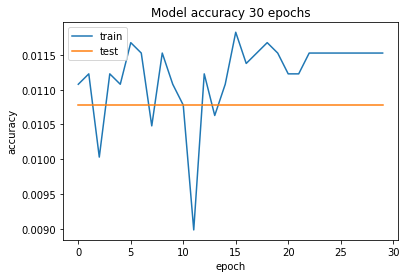

In [53]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy 30 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

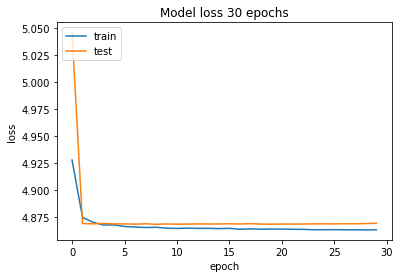

In [54]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model with augmentation
Using imgae augmentation could help increase number of instances for each bread image. For each image 24 augmented imgae with defined specification will be genrerated. Also more convlution layers are added causing more feature to be extracted

In [13]:
batch_size = 24

# this is the augmentation configuration we will use for training
train_datagen =ImageDataGenerator(
            rescale = 1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '../../../data/dog_images/train', #'dogImages/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use 

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '../../../data/dog_images/valid', #'dogImages/valid',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


In [18]:
aug_model = Sequential()
aug_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
aug_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=2))

aug_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
aug_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=2))

aug_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
aug_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=2))

aug_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
aug_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=2))

aug_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
aug_model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=2))

aug_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
aug_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=2))

aug_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
aug_model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
#conv2_model.add(BatchNormalization())
aug_model.add(GlobalAveragePooling2D())
#model.add(MaxPooling2D(pool_size=2))

aug_model.add(Dropout(0.3))
#conv2_model.add(Flatten())
aug_model.add(Dense(1024, activation='relu'))
aug_model.add(Dropout(0.3))
aug_model.add(Dense(512, activation='relu'))
aug_model.add(Dropout(0.4))
aug_model.add(Dense(256, activation='relu'))
aug_model.add(Dropout(0.3))
aug_model.add(Dense(133, activation='softmax'))

aug_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.augmentation.50epochs.hdf5', 
                               verbose=1, save_best_only=True)

history =  aug_model.fit_generator(train_generator, steps_per_epoch=8000// batch_size,
                  validation_data=validation_generator, validation_steps=800 // batch_size,
                  epochs=epochs,  callbacks=[checkpointer], verbose=1)

Epoch 1/50
333/333 [==============================] - 305s 915ms/step - loss: 4.9183 - acc: 0.0079 - val_loss: 4.8754 - val_acc: 0.0139
Epoch 2/50
333/333 [==============================] - 299s 897ms/step - loss: 4.8854 - acc: 0.0088 - val_loss: 4.8681 - val_acc: 0.0152
Epoch 3/50
333/333 [==============================] - 300s 900ms/step - loss: 4.8764 - acc: 0.0103 - val_loss: 4.8708 - val_acc: 0.0101
Epoch 4/50
333/333 [==============================] - 298s 895ms/step - loss: 4.8596 - acc: 0.0105 - val_loss: 4.8331 - val_acc: 0.0126
Epoch 5/50
333/333 [==============================] - 297s 891ms/step - loss: 4.7705 - acc: 0.0169 - val_loss: 4.8005 - val_acc: 0.0177
Epoch 6/50
333/333 [==============================] - 299s 898ms/step - loss: 4.7142 - acc: 0.0194 - val_loss: 4.7410 - val_acc: 0.0177
Epoch 7/50
333/333 [==============================] - 298s 893ms/step - loss: 4.6838 - acc: 0.0188 - val_loss: 4.6203 - val_acc: 0.0215
Epoch 8/50
333/333 [============================

Epoch 29/50
333/333 [==============================] - 298s 895ms/step - loss: 4.0409 - acc: 0.0717 - val_loss: 3.8301 - val_acc: 0.0871
Epoch 30/50
333/333 [==============================] - 298s 894ms/step - loss: 4.0144 - acc: 0.0687 - val_loss: 3.9589 - val_acc: 0.0821
Epoch 31/50
333/333 [==============================] - 298s 895ms/step - loss: 3.9774 - acc: 0.0781 - val_loss: 3.9091 - val_acc: 0.0896
Epoch 32/50
333/333 [==============================] - 297s 892ms/step - loss: 3.9463 - acc: 0.0807 - val_loss: 3.8684 - val_acc: 0.1111
Epoch 33/50
333/333 [==============================] - 299s 897ms/step - loss: 3.9201 - acc: 0.0845 - val_loss: 3.8230 - val_acc: 0.0972
Epoch 34/50
333/333 [==============================] - 297s 891ms/step - loss: 3.9164 - acc: 0.0817 - val_loss: 3.8515 - val_acc: 0.0859
Epoch 35/50
333/333 [==============================] - 298s 894ms/step - loss: 3.8784 - acc: 0.0828 - val_loss: 3.8378 - val_acc: 0.0934
Epoch 36/50
333/333 [====================

In [20]:
aug_model.load_weights('saved_models/weights.best.augmentation.50epochs.hdf5')
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(aug_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy after 50 epochs: %.4f%%' % test_accuracy)

Test accuracy after 50 epochs: 13.9952%


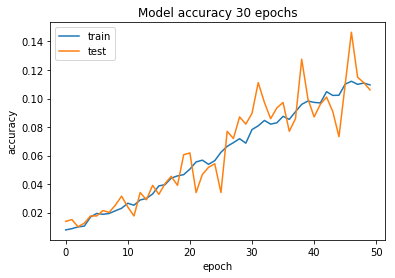

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy 30 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

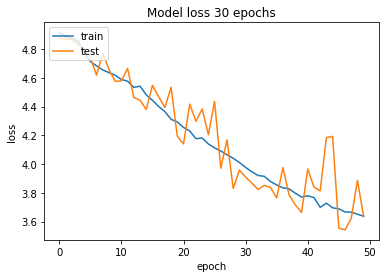

In [22]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

In Step 4, use transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.


### (IMPLEMENTATION) Transfer learning

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

### Obtain Bottleneck Features

In [17]:
import tensorflow as tf
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [52]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dropout(0.3))
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(Dropout(0.4))
VGG16_model.add(Dense(256, activation='relu'))
VGG16_model.add(Dropout(0.3))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)              

### Compile the Model

In [54]:
VGG16_model.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
                    , metrics=['accuracy'])

### Train the Model

In [55]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

history = VGG16_model.fit(train_VGG16, train_targets, 
                  validation_data=(valid_VGG16, valid_targets),
                  epochs=300, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/300
334/334 [==============================] - 2s 5ms/step - loss: 10.0173 - accuracy: 0.0124 - val_loss: 4.7618 - val_accuracy: 0.0311

Epoch 00001: val_loss improved from inf to 4.76175, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 2/300
334/334 [==============================] - 2s 5ms/step - loss: 5.5172 - accuracy: 0.0162 - val_loss: 4.8475 - val_accuracy: 0.0323

Epoch 00002: val_loss did not improve from 4.76175
Epoch 3/300
334/334 [==============================] - 1s 4ms/step - loss: 5.0466 - accuracy: 0.0204 - val_loss: 4.8560 - val_accuracy: 0.0359

Epoch 00003: val_loss did not improve from 4.76175
Epoch 4/300
334/334 [==============================] - 1s 4ms/step - loss: 4.9015 - accuracy: 0.0249 - val_loss: 4.8230 - val_accuracy: 0.0491

Epoch 00004: val_loss did not improve from 4.76175
Epoch 5/300
334/334 [==============================] - 1s 4ms/step - loss: 4.7879 - accuracy: 0.0350 - val_loss: 4.6761 - val_accuracy: 0.0826

Epoch 00005: val_loss

334/334 [==============================] - 2s 5ms/step - loss: 1.4052 - accuracy: 0.5922 - val_loss: 0.8773 - val_accuracy: 0.7473

Epoch 00034: val_loss improved from 0.88696 to 0.87732, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 35/300
334/334 [==============================] - 1s 4ms/step - loss: 1.3508 - accuracy: 0.6018 - val_loss: 0.8541 - val_accuracy: 0.7569

Epoch 00035: val_loss improved from 0.87732 to 0.85413, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 36/300
334/334 [==============================] - 2s 5ms/step - loss: 1.3551 - accuracy: 0.5943 - val_loss: 0.8550 - val_accuracy: 0.7473

Epoch 00036: val_loss did not improve from 0.85413
Epoch 37/300
334/334 [==============================] - 1s 4ms/step - loss: 1.3029 - accuracy: 0.6160 - val_loss: 0.8484 - val_accuracy: 0.7569

Epoch 00037: val_loss improved from 0.85413 to 0.84840, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 38/300
334/334 [==============================] -

334/334 [==============================] - 1s 4ms/step - loss: 0.5820 - accuracy: 0.8127 - val_loss: 0.6365 - val_accuracy: 0.8084

Epoch 00105: val_loss did not improve from 0.62061
Epoch 106/300
334/334 [==============================] - 1s 4ms/step - loss: 0.5759 - accuracy: 0.8121 - val_loss: 0.6350 - val_accuracy: 0.8120

Epoch 00106: val_loss did not improve from 0.62061
Epoch 107/300
334/334 [==============================] - 1s 4ms/step - loss: 0.5607 - accuracy: 0.8186 - val_loss: 0.6354 - val_accuracy: 0.8024

Epoch 00107: val_loss did not improve from 0.62061
Epoch 108/300
334/334 [==============================] - 1s 4ms/step - loss: 0.5671 - accuracy: 0.8174 - val_loss: 0.6293 - val_accuracy: 0.8096

Epoch 00108: val_loss did not improve from 0.62061
Epoch 109/300
334/334 [==============================] - 1s 4ms/step - loss: 0.5540 - accuracy: 0.8205 - val_loss: 0.6421 - val_accuracy: 0.8060

Epoch 00109: val_loss did not improve from 0.62061
Epoch 110/300
334/334 [======


Epoch 00187: val_loss did not improve from 0.61390
Epoch 188/300
334/334 [==============================] - 1s 4ms/step - loss: 0.3796 - accuracy: 0.8822 - val_loss: 0.6688 - val_accuracy: 0.7892

Epoch 00188: val_loss did not improve from 0.61390
Epoch 189/300
334/334 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8852 - val_loss: 0.6658 - val_accuracy: 0.7964

Epoch 00189: val_loss did not improve from 0.61390
Epoch 190/300
334/334 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8844 - val_loss: 0.6545 - val_accuracy: 0.8072

Epoch 00190: val_loss did not improve from 0.61390
Epoch 191/300
334/334 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8826 - val_loss: 0.6421 - val_accuracy: 0.8120

Epoch 00191: val_loss did not improve from 0.61390
Epoch 192/300
334/334 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8819 - val_loss: 0.6688 - val_accuracy: 0.7868

Epoch 00192: v


Epoch 00270: val_loss did not improve from 0.61390
Epoch 271/300
334/334 [==============================] - 2s 5ms/step - loss: 0.2716 - accuracy: 0.9109 - val_loss: 0.6597 - val_accuracy: 0.8012

Epoch 00271: val_loss did not improve from 0.61390
Epoch 272/300
334/334 [==============================] - 2s 5ms/step - loss: 0.2583 - accuracy: 0.9183 - val_loss: 0.6742 - val_accuracy: 0.8060

Epoch 00272: val_loss did not improve from 0.61390
Epoch 273/300
334/334 [==============================] - 1s 4ms/step - loss: 0.2657 - accuracy: 0.9124 - val_loss: 0.6978 - val_accuracy: 0.7904

Epoch 00273: val_loss did not improve from 0.61390
Epoch 274/300
334/334 [==============================] - 1s 4ms/step - loss: 0.2689 - accuracy: 0.9114 - val_loss: 0.6846 - val_accuracy: 0.7940

Epoch 00274: val_loss did not improve from 0.61390
Epoch 275/300
334/334 [==============================] - 2s 5ms/step - loss: 0.2668 - accuracy: 0.9141 - val_loss: 0.6912 - val_accuracy: 0.8084

Epoch 00275: v

### Load the Model with the Best Validation Loss

In [46]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [56]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.2201%


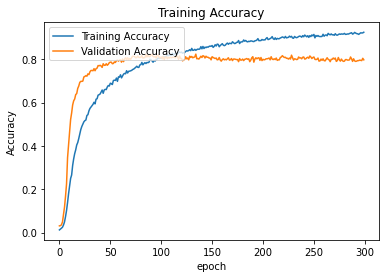

In [58]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

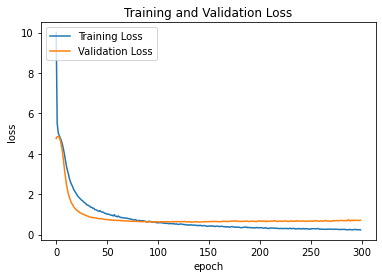

In [59]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

### Predict Dog Breed with the Model

In [14]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

## CNN with VGG19 Bottleneck Features

In [103]:
bottleneck_features = np.load('bottleneck_features/DogVGG19Data.npz')
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

VGG19_model = Sequential()
VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19_model.add(Dropout(0.3))
VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dropout(0.4))
VGG19_model.add(Dense(256, activation='relu'))
VGG19_model.add(Dropout(0.3))
VGG19_model.add(Dense(133, activation='softmax'))


# VGG19_model.compile(loss='categorical_crossentropy',
#                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
#                     , metrics=['accuracy'])

epochs = 300

learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.0
opt = tf.keras.optimizers.Adam(lr=learning_rate, decay=decay_rate)

VGG19_model.compile(loss='categorical_crossentropy',
                    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

In [104]:
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

history = VGG19_model.fit(train_VGG19, train_targets, 
                  validation_data=(valid_VGG19, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/300
334/334 [==============================] - 2s 5ms/step - loss: 5.4531 - accuracy: 0.0362 - val_loss: 3.9443 - val_accuracy: 0.1617

Epoch 00001: val_loss improved from inf to 3.94429, saving model to saved_models\weights.best.VGG19.hdf5
Epoch 2/300
334/334 [==============================] - 1s 4ms/step - loss: 3.6951 - accuracy: 0.1696 - val_loss: 2.2866 - val_accuracy: 0.4599

Epoch 00002: val_loss improved from 3.94429 to 2.28656, saving model to saved_models\weights.best.VGG19.hdf5
Epoch 3/300
334/334 [==============================] - 2s 5ms/step - loss: 2.7843 - accuracy: 0.2946 - val_loss: 1.6426 - val_accuracy: 0.5437

Epoch 00003: val_loss improved from 2.28656 to 1.64257, saving model to saved_models\weights.best.VGG19.hdf5
Epoch 4/300
334/334 [==============================] - 2s 5ms/step - loss: 2.3562 - accuracy: 0.3666 - val_loss: 1.3713 - val_accuracy: 0.6192

Epoch 00004: val_loss improved from 1.64257 to 1.37131, saving model to saved_models\weights.best.VGG


Epoch 00079: val_loss did not improve from 0.86028
Epoch 80/300
334/334 [==============================] - 1s 4ms/step - loss: 1.0996 - accuracy: 0.7102 - val_loss: 0.9811 - val_accuracy: 0.7317

Epoch 00080: val_loss did not improve from 0.86028
Epoch 81/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1055 - accuracy: 0.7084 - val_loss: 0.8888 - val_accuracy: 0.7413

Epoch 00081: val_loss did not improve from 0.86028
Epoch 82/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1392 - accuracy: 0.7054 - val_loss: 0.9466 - val_accuracy: 0.7365

Epoch 00082: val_loss did not improve from 0.86028
Epoch 83/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1163 - accuracy: 0.7096 - val_loss: 0.8599 - val_accuracy: 0.7689

Epoch 00083: val_loss improved from 0.86028 to 0.85990, saving model to saved_models\weights.best.VGG19.hdf5
Epoch 84/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1102 - accuracy: 0.7075 - va


Epoch 00120: val_loss did not improve from 0.84986
Epoch 121/300
334/334 [==============================] - 1s 4ms/step - loss: 1.0244 - accuracy: 0.7352 - val_loss: 0.9648 - val_accuracy: 0.7281

Epoch 00121: val_loss did not improve from 0.84986
Epoch 122/300
334/334 [==============================] - 1s 4ms/step - loss: 1.0969 - accuracy: 0.7198 - val_loss: 0.9644 - val_accuracy: 0.7449

Epoch 00122: val_loss did not improve from 0.84986
Epoch 123/300
334/334 [==============================] - 1s 4ms/step - loss: 1.0789 - accuracy: 0.7253 - val_loss: 0.9134 - val_accuracy: 0.7545

Epoch 00123: val_loss did not improve from 0.84986
Epoch 124/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1578 - accuracy: 0.7139 - val_loss: 0.9208 - val_accuracy: 0.7329

Epoch 00124: val_loss did not improve from 0.84986
Epoch 125/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1199 - accuracy: 0.7112 - val_loss: 0.9156 - val_accuracy: 0.7305

Epoch 00125: v


Epoch 00203: val_loss did not improve from 0.84986
Epoch 204/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1347 - accuracy: 0.7295 - val_loss: 1.0089 - val_accuracy: 0.7521

Epoch 00204: val_loss did not improve from 0.84986
Epoch 205/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1399 - accuracy: 0.7299 - val_loss: 1.0910 - val_accuracy: 0.7293

Epoch 00205: val_loss did not improve from 0.84986
Epoch 206/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1451 - accuracy: 0.7292 - val_loss: 1.0468 - val_accuracy: 0.7413

Epoch 00206: val_loss did not improve from 0.84986
Epoch 207/300
334/334 [==============================] - 1s 4ms/step - loss: 1.2037 - accuracy: 0.7183 - val_loss: 1.0709 - val_accuracy: 0.7269

Epoch 00207: val_loss did not improve from 0.84986
Epoch 208/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1854 - accuracy: 0.7195 - val_loss: 1.1655 - val_accuracy: 0.7102

Epoch 00208: v


Epoch 00286: val_loss did not improve from 0.84986
Epoch 287/300
334/334 [==============================] - 1s 4ms/step - loss: 1.1900 - accuracy: 0.7225 - val_loss: 1.0425 - val_accuracy: 0.7281

Epoch 00287: val_loss did not improve from 0.84986
Epoch 288/300
334/334 [==============================] - 1s 4ms/step - loss: 1.2252 - accuracy: 0.7199 - val_loss: 1.1556 - val_accuracy: 0.7377

Epoch 00288: val_loss did not improve from 0.84986
Epoch 289/300
334/334 [==============================] - 1s 4ms/step - loss: 1.2799 - accuracy: 0.7141 - val_loss: 1.1488 - val_accuracy: 0.7198

Epoch 00289: val_loss did not improve from 0.84986
Epoch 290/300
334/334 [==============================] - 1s 4ms/step - loss: 1.2564 - accuracy: 0.7193 - val_loss: 1.1998 - val_accuracy: 0.7126

Epoch 00290: val_loss did not improve from 0.84986
Epoch 291/300
334/334 [==============================] - 1s 4ms/step - loss: 1.2768 - accuracy: 0.7129 - val_loss: 1.1535 - val_accuracy: 0.7006

Epoch 00291: v

In [105]:
# load VGG19 trained weghits
VGG19_model.load_weights('saved_models/weights.best.VGG19.hdf5')

# get index of predicted dog breed for each image in test set
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 74.6411%


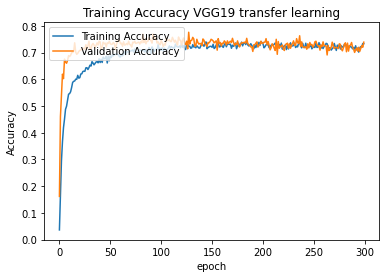

In [106]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy VGG19 transfer learning')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

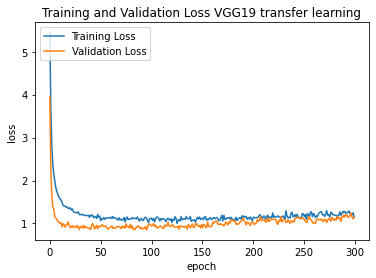

In [107]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss VGG19 transfer learning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

## CNN with ResNet-50 bottleneck features

In [231]:
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']

Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
# Resnet50_model.add(Dropout(0.4))
# Resnet50_model.add(Dense(728, activation='relu'))
Resnet50_model.add(Dropout(0.4))
Resnet50_model.add(Dense(512, activation='relu'))
Resnet50_model.add(Dropout(0.4))
Resnet50_model.add(Dense(256, activation='relu'))
Resnet50_model.add(Dropout(0.4))
Resnet50_model.add(Dense(133, activation='softmax'))


epochs = 50



learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=1000000,
    decay_rate=0.0001,
    staircase=True)


# learning_rate = 0.01
# decay_rate = learning_rate / epochs

momentum = 0.01
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule) # momentum=momentum

Resnet50_model.compile(loss='categorical_crossentropy',
                    optimizer= opt,#tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

In [232]:
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

history = Resnet50_model.fit(train_Resnet50, train_targets, 
                  validation_data=(valid_Resnet50, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/50
334/334 [==============================] - 2s 4ms/step - loss: 3.9040 - accuracy: 0.1516 - val_loss: 1.7273 - val_accuracy: 0.5796

Epoch 00001: val_loss improved from inf to 1.72734, saving model to saved_models\weights.best.Resnet50.hdf5
Epoch 2/50
334/334 [==============================] - 1s 4ms/step - loss: 1.9727 - accuracy: 0.4503 - val_loss: 1.0013 - val_accuracy: 0.7210

Epoch 00002: val_loss improved from 1.72734 to 1.00130, saving model to saved_models\weights.best.Resnet50.hdf5
Epoch 3/50
334/334 [==============================] - 1s 4ms/step - loss: 1.5359 - accuracy: 0.5410 - val_loss: 0.8834 - val_accuracy: 0.7317

Epoch 00003: val_loss improved from 1.00130 to 0.88335, saving model to saved_models\weights.best.Resnet50.hdf5
Epoch 4/50
334/334 [==============================] - 1s 4ms/step - loss: 1.3129 - accuracy: 0.6088 - val_loss: 0.8846 - val_accuracy: 0.7257

Epoch 00004: val_loss did not improve from 0.88335
Epoch 5/50
334/334 [=========================

334/334 [==============================] - 1s 4ms/step - loss: 0.5927 - accuracy: 0.8325 - val_loss: 0.6950 - val_accuracy: 0.8060

Epoch 00040: val_loss did not improve from 0.64071
Epoch 41/50
334/334 [==============================] - 1s 4ms/step - loss: 0.5722 - accuracy: 0.8335 - val_loss: 0.6852 - val_accuracy: 0.8048

Epoch 00041: val_loss did not improve from 0.64071
Epoch 42/50
334/334 [==============================] - 1s 4ms/step - loss: 0.5307 - accuracy: 0.8466 - val_loss: 0.6958 - val_accuracy: 0.8048

Epoch 00042: val_loss did not improve from 0.64071
Epoch 43/50
334/334 [==============================] - 1s 4ms/step - loss: 0.5822 - accuracy: 0.8326 - val_loss: 0.6949 - val_accuracy: 0.8000

Epoch 00043: val_loss did not improve from 0.64071
Epoch 44/50
334/334 [==============================] - 1s 4ms/step - loss: 0.5684 - accuracy: 0.8437 - val_loss: 0.6855 - val_accuracy: 0.8108

Epoch 00044: val_loss did not improve from 0.64071
Epoch 45/50
334/334 [================

In [233]:
# load Resnet50 trained weghits
Resnet50_model.load_weights('saved_models/weights.best.Resnet50.hdf5')

# get index of predicted dog breed for each image in test set
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 78.5885%


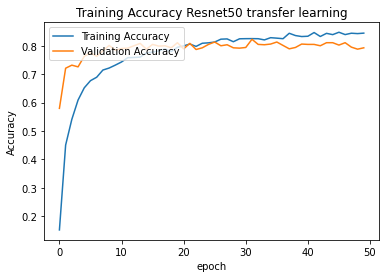

In [235]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy Resnet50 transfer learning')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

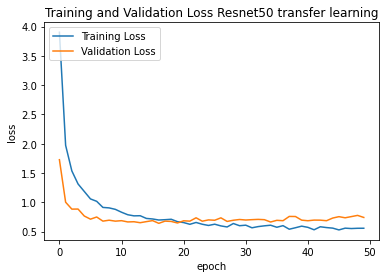

In [234]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss Resnet50 transfer learning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

## CNN with Inception bottleneck features

In [254]:
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_Inception = bottleneck_features['train']
valid_Inception = bottleneck_features['valid']
test_Inception = bottleneck_features['test']

Inception_model = Sequential()
Inception_model.add(GlobalAveragePooling2D(input_shape=train_Inception.shape[1:]))
# Inception_model.add(Dropout(0.4))
# Inception_model.add(Dense(512, activation='relu'))
Inception_model.add(Dropout(0.4))
Inception_model.add(Dense(256, activation='relu'))
Inception_model.add(Dropout(0.4))
Inception_model.add(Dense(133, activation='softmax'))


epochs = 50



learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=1000000,
    decay_rate=0.0001,
    staircase=True)


# learning_rate = 0.01
# decay_rate = learning_rate / epochs

momentum = 0.0
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule) # momentum=momentum

Inception_model.compile(loss='categorical_crossentropy',
                    optimizer= opt,#tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

In [255]:
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionV3.hdf5', 
                               verbose=1, save_best_only=True)

history = Inception_model.fit(train_Inception, train_targets, 
                  validation_data=(valid_Inception, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/50
334/334 [==============================] - 2s 6ms/step - loss: 2.3430 - accuracy: 0.4841 - val_loss: 0.7583 - val_accuracy: 0.7784

Epoch 00001: val_loss improved from inf to 0.75826, saving model to saved_models\weights.best.InceptionV3.hdf5
Epoch 2/50
334/334 [==============================] - 2s 5ms/step - loss: 1.0006 - accuracy: 0.7144 - val_loss: 0.6425 - val_accuracy: 0.7952

Epoch 00002: val_loss improved from 0.75826 to 0.64253, saving model to saved_models\weights.best.InceptionV3.hdf5
Epoch 3/50
334/334 [==============================] - 2s 6ms/step - loss: 0.8128 - accuracy: 0.7654 - val_loss: 0.5701 - val_accuracy: 0.8287

Epoch 00003: val_loss improved from 0.64253 to 0.57011, saving model to saved_models\weights.best.InceptionV3.hdf5
Epoch 4/50
334/334 [==============================] - 2s 6ms/step - loss: 0.7031 - accuracy: 0.7856 - val_loss: 0.5707 - val_accuracy: 0.8228

Epoch 00004: val_loss did not improve from 0.57011
Epoch 5/50
334/334 [================

In [256]:
# load Resnet50 trained weghits
Inception_model.load_weights('saved_models/weights.best.InceptionV3.hdf5')

# get index of predicted dog breed for each image in test set
Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.4258%


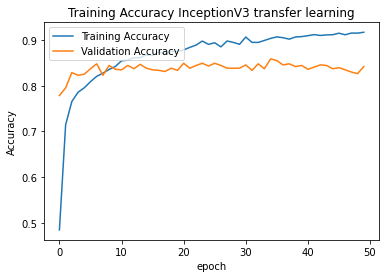

In [257]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy InceptionV3 transfer learning')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

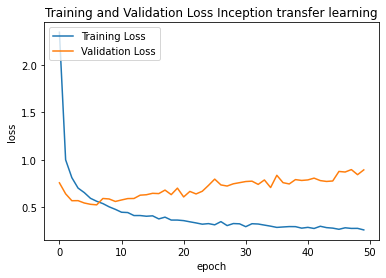

In [258]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss Inception transfer learning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

## CNN with Xception bottleneck features

In [159]:
bottleneck_features = np.load('bottleneck_features/DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

Xception_model = Sequential()
Xception_model.add(GlobalAveragePooling2D(input_shape=train_Xception.shape[1:]))
# Inception_model.add(Dropout(0.4))
# Inception_model.add(Dense(512, activation='relu'))
# Xception_model.add(Dropout(0.4))
# Xception_model.add(Dense(256, activation='relu'))
Xception_model.add(Dropout(0.4))
Xception_model.add(Dense(133, activation='softmax'))


epochs = 50



learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=1000000,
    decay_rate=0.0001,
    staircase=True)


# learning_rate = 0.01
# decay_rate = learning_rate / epochs

momentum = 0.0
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule) # momentum=momentum

Xception_model.compile(loss='categorical_crossentropy',
                    optimizer= opt,#tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

In [263]:
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', 
                               verbose=1, save_best_only=True)

history = Xception_model.fit(train_Xception, train_targets, 
                  validation_data=(valid_Xception, valid_targets),
                  epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/50
334/334 [==============================] - 3s 7ms/step - loss: 1.2626 - accuracy: 0.6984 - val_loss: 0.5640 - val_accuracy: 0.8275

Epoch 00001: val_loss improved from inf to 0.56397, saving model to saved_models\weights.best.Xception.hdf5
Epoch 2/50
334/334 [==============================] - 3s 8ms/step - loss: 0.4215 - accuracy: 0.8708 - val_loss: 0.5052 - val_accuracy: 0.8287

Epoch 00002: val_loss improved from 0.56397 to 0.50519, saving model to saved_models\weights.best.Xception.hdf5
Epoch 3/50
334/334 [==============================] - 2s 7ms/step - loss: 0.2975 - accuracy: 0.9091 - val_loss: 0.4848 - val_accuracy: 0.8491

Epoch 00003: val_loss improved from 0.50519 to 0.48479, saving model to saved_models\weights.best.Xception.hdf5
Epoch 4/50
334/334 [==============================] - 3s 8ms/step - loss: 0.2326 - accuracy: 0.9280 - val_loss: 0.4702 - val_accuracy: 0.8455

Epoch 00004: val_loss improved from 0.48479 to 0.47017, saving model to saved_models\weights.bes


Epoch 00041: val_loss did not improve from 0.45170
Epoch 42/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.6932 - val_accuracy: 0.8611

Epoch 00042: val_loss did not improve from 0.45170
Epoch 43/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.7211 - val_accuracy: 0.8455

Epoch 00043: val_loss did not improve from 0.45170
Epoch 44/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0162 - accuracy: 0.9961 - val_loss: 0.6889 - val_accuracy: 0.8527

Epoch 00044: val_loss did not improve from 0.45170
Epoch 45/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.7230 - val_accuracy: 0.8575

Epoch 00045: val_loss did not improve from 0.45170
Epoch 46/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.6777 - val_accuracy: 0.8563

Epoch 00046: val_loss di

In [161]:
# load Resnet50 trained weghits
Xception_model.load_weights('saved_models/weights.best.Xception.hdf5')

# get index of predicted dog breed for each image in test set
Xception_predictions = [np.argmax(Xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Xception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Xception_predictions)==np.argmax(test_targets, axis=1))/len(Xception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 85.0478%


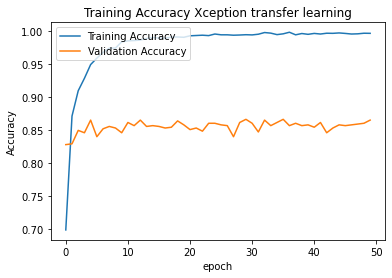

In [265]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy Xception transfer learning')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

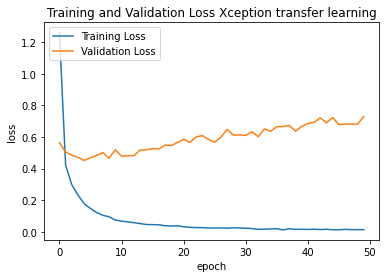

In [266]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss Xception transfer learning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [24]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    include_top=False)

#  freeze the base model layers
base_model.trainable = False

In [25]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen =ImageDataGenerator(
            rescale = 1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

# this is the augmentation configuration use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'dogImages/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use 

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'dogImages/valid',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'dogImages/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

for layer in base_model.layers:
    layer.trainable = False

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
Found 836 images belonging to 133 classes.


In [26]:
from tensorflow.keras import layers as LR
from tensorflow.keras import Model 

x = LR.Flatten()(base_model.output)
x = LR.Dropout(0.3)(x)
x = LR.Dense(512, activation='relu')(x)
x = LR.Dropout(0.3)(x)
x = LR.Dense(133, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [28]:
### TODO: Compile the model.
epochs = 10



learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=1000000,
    decay_rate=0.0001,
    staircase=True)


# learning_rate = 0.01
# decay_rate = learning_rate / epochs

momentum = 0.0
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule) # momentum=momentum

model.compile(loss='categorical_crossentropy',
                    optimizer= opt,#tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

In [29]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50_with_augmentation.hdf5', 
                               verbose=1, save_best_only=True)
history =  model.fit(train_generator, 
                  validation_data=validation_generator,
                  epochs=epochs,  batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/10
418/418 [==============================] - 191s 446ms/step - loss: 4.9500 - accuracy: 0.0078 - val_loss: 4.8896 - val_accuracy: 0.0108

Epoch 00001: val_loss improved from inf to 4.88963, saving model to saved_models\weights.best.Resnet50_with_augmentation.hdf5
Epoch 2/10
418/418 [==============================] - 137s 328ms/step - loss: 4.8895 - accuracy: 0.0102 - val_loss: 4.8889 - val_accuracy: 0.0108

Epoch 00002: val_loss improved from 4.88963 to 4.88891, saving model to saved_models\weights.best.Resnet50_with_augmentation.hdf5
Epoch 3/10
418/418 [==============================] - 136s 325ms/step - loss: 4.8887 - accuracy: 0.0102 - val_loss: 4.8882 - val_accuracy: 0.0108

Epoch 00003: val_loss improved from 4.88891 to 4.88823, saving model to saved_models\weights.best.Resnet50_with_augmentation.hdf5
Epoch 4/10
418/418 [==============================] - 138s 330ms/step - loss: 4.8877 - accuracy: 0.0108 - val_loss: 4.8876 - val_accuracy: 0.0108

Epoch 00004: val_loss impr

**This approach is slow to train so another model based on Xception created in below part.**

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning and Fine tuning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.



In [207]:
# Create the base model from the pre-trained convnets
base_model = tf.keras.applications.Xception(
    weights='imagenet',  
    input_shape=(224,224,3),
    include_top=False)

# Freeze the convolutional base
base_model.trainable = False

In [208]:
# Use data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [66]:
# pre-process the data as tensor for Xception model
train_tensors = paths_to_tensor(train_files).astype('float32')
valid_tensors = paths_to_tensor(valid_files).astype('float32')
test_tensors = paths_to_tensor(test_files).astype('float32')

100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:15<00:00, 54.60it/s]


In [209]:
#Rescale pixel values in tensors
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# preprocess_input = tf.keras.applications.xception.preprocess_input

In [210]:
# Alternatively, rescale pixel values from [0, 255] to [-1, 1] using a Rescaling layer.
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [211]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [212]:
# Add a classification head
prediction_layer = tf.keras.layers.Dense(133,activation='softmax')

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Bottleneck features are very quick way to create CNN with good accuracy. In this step we use the model architecture by importing it from keras applications. For test case Xception model trained on image net imported as base_model from **'tf.keras.applications.Xception'** by droping the top layer. 

- a) Freeze it's layers to not change during first training phase after attaching another layer as top layer into basemodel.
- b) For data augmentation we create a layer using keras preprocessing layers as a sequential type
- c) Convert images in training, validation, test datasets into tensors using  paths_to_tensor
- d) Create a preproceesing layer to rescale input tensors pixel values to be between [-1, 1] as required by Xception
- e) Create global average pooling layer 
- f) Attach all the created layers as below by adding a dropout and dense layer at the top of base model.
- g) compile the model with selected optimizer and hyperparameters with small learning rate to train new attached classifier header
- h) Train the model with predefined epochs (few is better to avoid overfitting in later time)
- i) To fine tune new model unfreeze some layers or all of it by you choice. Here from 132 layers we enabled last 32 layers to be trainable
- j) Decrease learning rate to avoid overfitting and compile the model
- k) Train the model agian to fine tune it and enhacing it's accuracy




In [338]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

### (IMPLEMENTATION) Compile the Model

In [339]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [217]:
initial_epochs = 15
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.with_augmentation_tune.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, train_targets, 
                  validation_data=(valid_tensors, valid_targets),
                  epochs=initial_epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/15
334/334 [==============================] - 71s 200ms/step - loss: 4.0427 - accuracy: 0.2118 - val_loss: 2.2203 - val_accuracy: 0.6527

Epoch 00001: val_loss improved from inf to 2.22027, saving model to saved_models\weights.best.Xception.with_augmentation_tune.hdf5
Epoch 2/15
334/334 [==============================] - 67s 200ms/step - loss: 2.2519 - accuracy: 0.4981 - val_loss: 1.0481 - val_accuracy: 0.7701

Epoch 00002: val_loss improved from 2.22027 to 1.04811, saving model to saved_models\weights.best.Xception.with_augmentation_tune.hdf5
Epoch 3/15
334/334 [==============================] - 67s 202ms/step - loss: 1.6309 - accuracy: 0.5847 - val_loss: 0.7860 - val_accuracy: 0.8012

Epoch 00003: val_loss improved from 1.04811 to 0.78597, saving model to saved_models\weights.best.Xception.with_augmentation_tune.hdf5
Epoch 4/15
334/334 [==============================] - 67s 202ms/step - loss: 1.4001 - accuracy: 0.6278 - val_loss: 0.6913 - val_accuracy: 0.7940

Epoch 00004: va

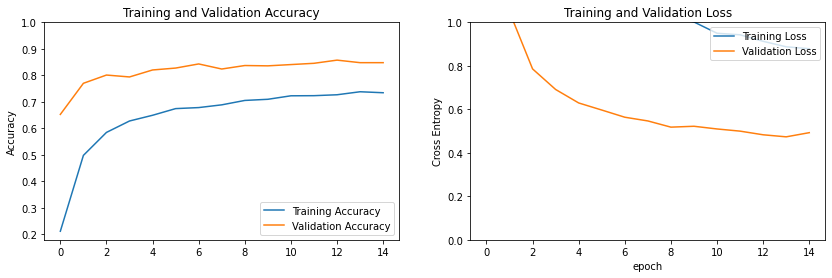

In [218]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning

In [219]:
# Un-freeze the top layers of the model
base_model.trainable = True

In [220]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  132


In [221]:
# Compile the model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [222]:
len(model.trainable_variables)

43

In [223]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv_11 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_11 (TFOpLam (None, 224, 224, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 2048)              0  

In [224]:
# Continue training the model
fine_tune_epochs = 30
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_tensors, train_targets,
                      initial_epoch=history.epoch[-1],
                      validation_data=(valid_tensors, valid_targets),
                      epochs=total_epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 15/45
334/334 [==============================] - 106s 305ms/step - loss: 0.7708 - accuracy: 0.7671 - val_loss: 0.4533 - val_accuracy: 0.8467

Epoch 00015: val_loss improved from 0.47353 to 0.45332, saving model to saved_models\weights.best.Xception.with_augmentation_tune.hdf5
Epoch 16/45
334/334 [==============================] - 102s 304ms/step - loss: 0.6971 - accuracy: 0.7882 - val_loss: 0.4345 - val_accuracy: 0.8587

Epoch 00016: val_loss improved from 0.45332 to 0.43448, saving model to saved_models\weights.best.Xception.with_augmentation_tune.hdf5
Epoch 17/45
334/334 [==============================] - 102s 305ms/step - loss: 0.6697 - accuracy: 0.7927 - val_loss: 0.4271 - val_accuracy: 0.8611

Epoch 00017: val_loss improved from 0.43448 to 0.42713, saving model to saved_models\weights.best.Xception.with_augmentation_tune.hdf5
Epoch 18/45
334/334 [==============================] - 102s 306ms/step - loss: 0.6342 - accuracy: 0.8004 - val_loss: 0.4221 - val_accuracy: 0.8647

Epo

In [332]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

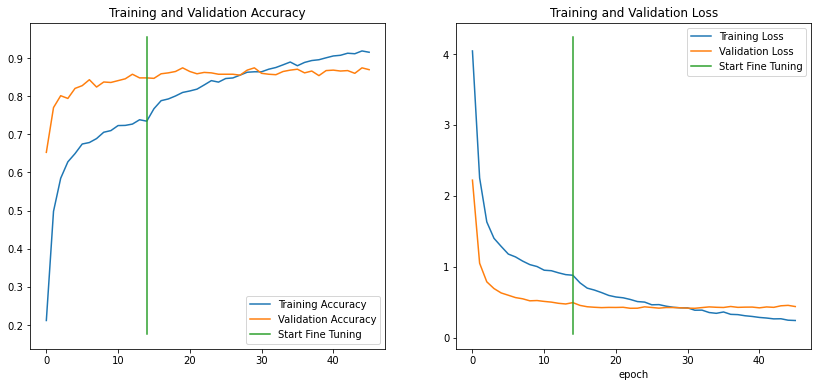

In [333]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
#plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# base_model = keras.applications.Xception(
#     weights="imagenet",  # Load weights pre-trained on ImageNet.
#     input_shape=(224, 224, 3),
#     include_top=False,
# )  # Do not include the ImageNet classifier at the top.

# # Freeze the base_model
# base_model.trainable = False

# # Create new model on top
# inputs = keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)  # Apply random data augmentation

# # Pre-trained Xception weights requires that input be normalized
# # from (0, 255) to a range (-1., +1.), the normalization layer
# # does the following, outputs = (inputs - mean) / sqrt(var)
# norm_layer = keras.layers.experimental.preprocessing.Normalization()
# mean = np.array([127.5] * 3)
# var = mean ** 2
# # Scale inputs to [-1, +1]
# x = norm_layer(x)
# norm_layer.set_weights([mean, var])

# # The base model contains batchnorm layers. We want to keep them in inference mode
# # when we unfreeze the base model for fine-tuning, so we make sure that the
# # base_model is running in inference mode here.
# x = base_model(x, training=False)
# x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
# outputs = keras.layers.Dense(133, activation='softmax')(x)
# model = keras.Model(inputs, outputs)

# model.summary()

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [340]:
### TODO: Load the model weights with the best validation loss.
# load Resnet50 trained weghits
model.load_weights('saved_models/weights.best.Xception.with_augmentation_tune.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [341]:
### TODO: Calculate classification accuracy on the test dataset.

# # get index of predicted dog breed for each image in test set
Xception_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Xception_predictions)==np.argmax(test_targets, axis=1))/len(Xception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 0.0000%


<ipython-input-341-7216a04b606d>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  test_accuracy = 100*np.sum(np.array(Xception_predictions)==np.argmax(test_targets, axis=1))/len(Xception_predictions)


In [155]:
test_loss, test_acc = model.evaluate(test_generator, steps= len(test_targets) // batch_size, verbose=1)
print('test acc:', test_acc*100)

52/52 [==============================] - 14s 246ms/step - loss: 5.2141 - accuracy: 0.0048
test acc: 0.4807692486792803


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [179]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *
import os

def Xception_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Xception_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [185]:
test_results=[]

for dog_img_path in dog_files_short:
    if Xception_predict_breed(dog_img_path).lower() == os.path.basename(dog_img_path).split('_')[0].lower():
        test_results.append(1)
    else:
        test_results.append(0)

In [188]:
print('Accuracy for this test is:', 100*np.sum(test_results)/len(dog_files_short))

Accuracy for this test is: 30.0


### Checking trained base model

In [187]:
tensors_short = paths_to_tensor(dog_files_short)

dog_test_names = [os.path.basename(dog_img_path).split('_')[0].lower() for dog_img_path in dog_files_short] 


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 138.77it/s]


In [202]:
def model_predict_breed(tensorx):
    predicted_vectors = model.predict(tensorx).argmax(axis=1)
    predicted_names = [dog_names[x].lower() for x in predicted_vectors]
    return predicted_names

In [205]:
test_results=[]
count =0 

predicted_names = model_predict_breed(tensors_short)

for name in predicted_names:
    if name == dog_test_names[count]:
        test_results.append(1)
    else:
        test_results.append(0)
    count += 1

In [206]:
print('Accuracy for this test is:', 100*np.sum(test_results)/len(dog_files_short))

Accuracy for this test is: 27.0


---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [328]:
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


# define Xception model to predict image class
Xception_label_model = tf.keras.applications.Xception(weights='imagenet',input_shape=(224, 224, 3), include_top=False )


def Xception_predict_labels(img_path):
    img = tf.keras.applications.xception.preprocess_input(path_to_tensor(img_path))
    return np.argmax(Xception_label_model.predict(img))

def is_dog_detected(img_path):
    prediction = Xception_predict_labels(img_path)
#     prediction = dog_detector(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

In [329]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def predict_dog_breed(img_path):
    
    # Boolean to check if the image is dog or human
    is_dog = is_dog_detected(img_path)
    
    if is_dog:
        bread_label = Xception_predict_breed(img_path)
    else:
         bread_label = Xception_predict_breed(img_path)
        
    
    return is_dog, bread_label

In [330]:
def predict_plot_breads(img_path):
    cols =3  # number of subplot rows
    idx =1   # subplot counter
    plt.figure(figsize=(15,15))
    files = glob('test_images/*.*')  # list all files in directory
    
    rows = 1 + len(files)//cols    # number of rows required based on number of files
    
    for img_path in files:
        # loads RGB image as PIL.Image.Image type
        img = image.load_img(img_path, target_size=(224, 224))
        # plot image file
        plt.subplot(rows,cols,idx).imshow(img)
        
        is_dog, bread_label = predict_dog_breed(img_path)
        
        if is_dog:
            plt.title("It's a dog image.\nBread is:\n {}".format(bread_label))
        else:
            plt.title("It's a human image.\nResemble bread is:\n {}".format(bread_label))
        idx+=1
    

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

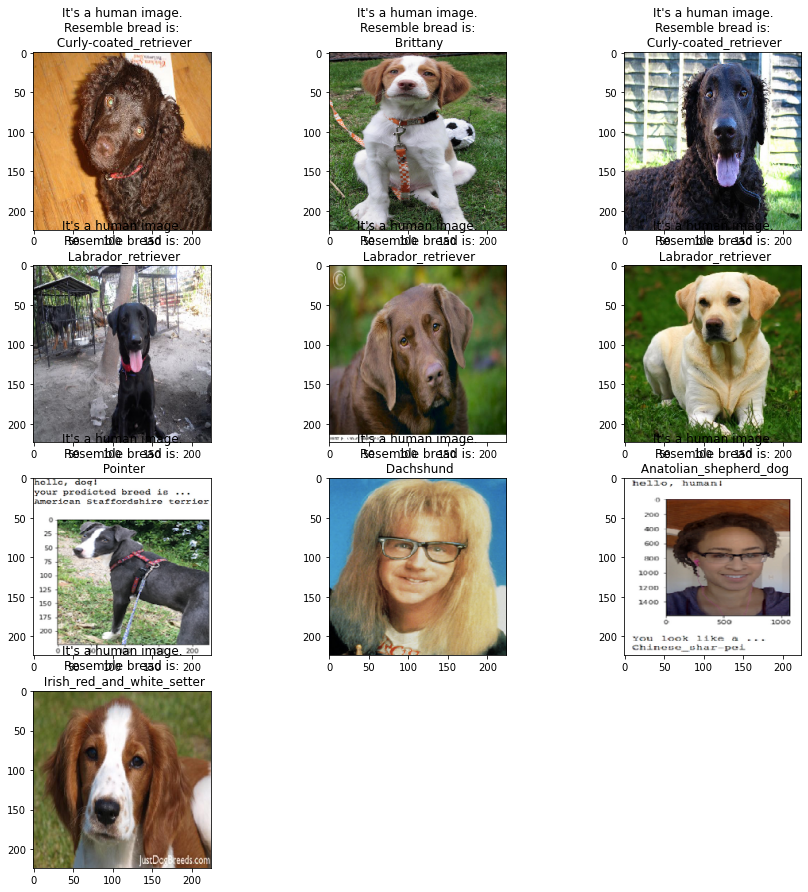

In [331]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
predict_plot_breads('test_images')

In [327]:
chech_results=[]
for img_path in glob('test_images/*.*'):
    prediction = dog_detector(img_path)
    if prediction :
        chech_results.append(1)
    else:
        chech_results.append(0)
            
np.sum(chech_results)/len(glob('test_images/*.*'))

0.0